In [2]:
# General libraries
from os import path, listdir
from sys import path as sysPath

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For data analysis
from sklearn.metrics import confusion_matrix, accuracy_score

# For loading in Matt's python libraries for SPAM related content
sysPath.append( path.abspath( "../Support_Code/" ) )
import general_module as gm
import info_module as im
gm.test()
im.test()


GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM


In [3]:
tInfo = im.target_info_class( targetDir = '../../spam_data_pl3/587722984435351614/', printAll = False, newInfo=False)
print(tInfo.status)

True


In [4]:
# Read data
wndDir = tInfo.targetDir + 'wndcharm/'
rawLoc = wndDir + 'rawFeats.csv'
rawDF = pd.read_csv(rawLoc)
print(rawDF.shape)

(9987, 2921)


In [5]:
# Filter out any rows with invalid values
validDF = rawDF[~rawDF.isin([np.nan, np.inf, -np.inf]).any(1)]

print("Before: ", rawDF.shape[0])
print("After : ", validDF.shape[0])

# Extract feature values
X = validDF.iloc[:,2:].values 

# Preprocess data and save scalar for later use
from pickle import dump

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print( X_scaled.shape )

scaleLoc = wndDir + 'scaler.pkl'
dump(sc, open(scaleLoc, 'wb'))


Before:  9987
After :  9972
(9972, 2919)


(0, 100000)

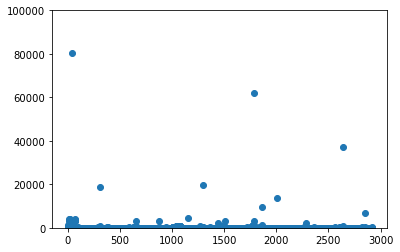

In [9]:
plt.scatter(range(sc.mean_.shape[0]),sc.mean_)
plt.ylim([0,100000])

In [6]:
# Save new scaled values

scaledLoc = wndDir + 'scaledFeats.csv'
cList = list( rawDF.columns )
print(cList.pop(0))
print(cList.pop(0))

# Open file if there
if False and path.exists( scaledLoc ):
    scaledDF = pd.read_csv( scaledLoc )
    
# Else create from scratch
else:
    scaledDF = pd.DataFrame( columns=validDF.columns )
    scaledDF['run_id'] = validDF['run_id']
    scaledDF['zoo_merger_score'] = validDF['zoo_merger_score']

    for i, col in enumerate( cList ):
        scaledDF[col] = X_scaled[:,i]
        print(' %4d / %4d '%(i,scaledDF.shape[1] ), end='\r' )


if not path.exists(scaledLoc):
    scaledDF.to_csv(scaledLoc, index = False)
print("Scaled Saved")

run_id
zoo_merger_score
Scaled Saved


In [7]:
# Analyze raw features for their variance
from sklearn.feature_selection import VarianceThreshold
p = 1

n = 51
pList = np.linspace(0.5,1,n)
count = np.zeros(n)

for i, p in enumerate(pList):
    var = VarianceThreshold( threshold=(p * (1 - p)) )
    varX = var.fit_transform(X)
    count[i] = varX.shape[1]
    print(i,end='\r')


Text(0.5, 1.0, 'Variance Threshold')

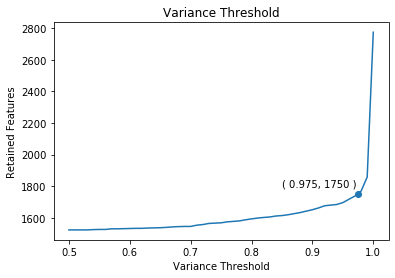

In [21]:
# Choose 2.5% variance
p = 0.025
var = VarianceThreshold( threshold=(p * (1 - p)) )
varX = var.fit_transform(X)
tempy = varX.shape[1]

# Filter selected 

# Plot results and selection
plt.plot(1-pList,count)
plt.ylabel('Retained Features')
plt.xlabel('Variance Threshold')

plt.scatter( 1-p, tempy)
plt.text( .85, tempy+50, '( %.3f, %d )'%(1-p,tempy), rotation=0)
plt.title("Variance Threshold")


In [11]:
# Get column mask for filtering low variance
varMask = var.get_support()

newColumns = []
for i, col in enumerate( cList ):
    
    if varMask[i]:
        newColumns.append(col)

# Add scores and IDs to list
newColumns.insert(0,'run_id')
newColumns.insert(1,'zoo_merger_score')

varDF = scaledDF[ newColumns ]

print("Should be 1750+2: ", varDF.shape[1] ) 
f1Loc = wndDir + 'f1_feats.csv'

varDF.to_csv(f1Loc, index = False)
print("Variance saved")

Should be 1750+2:  1752
Variance saved
